In [1]:
import sys 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_test = pd.read_csv("test.csv")

In [3]:
df_test.shape

(367, 12)

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.shape

(614, 13)

In [7]:
total = df_train.isnull().sum().sort_values(ascending=False)

In [68]:

percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
df_train['Gender'] = df_train['Gender'].fillna(
df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(
df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(
df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(
df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(
df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(
df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
df_train['Credit_History'].dropna().mode().values[0] )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


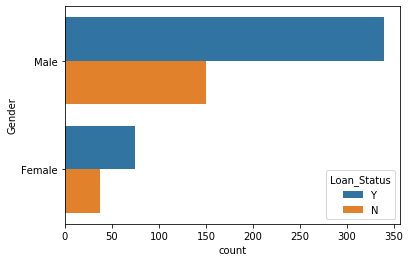

In [18]:
sns.countplot(y = 'Gender', hue='Loan_Status' , data = df_train)

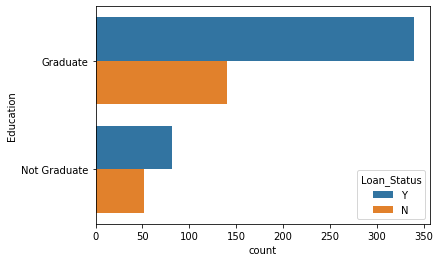

In [19]:
sns.countplot(y='Education',hue='Loan_Status', data=df_train)

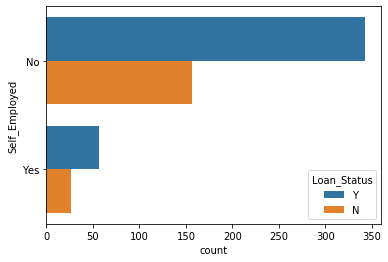

In [24]:
sns.countplot(y='Self_Employed',hue='Loan_Status', data=df_train)

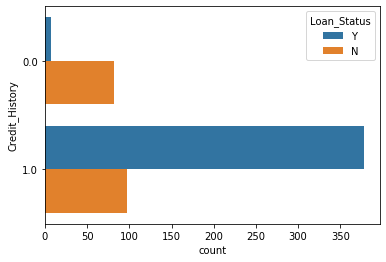

In [25]:
sns.countplot(y='Credit_History',hue='Loan_Status', data=df_train)

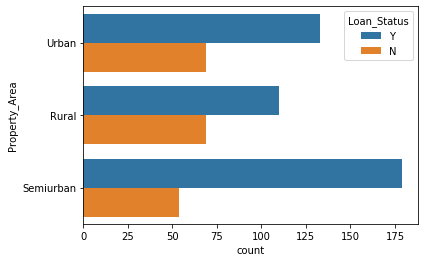

In [26]:
sns.countplot(y='Property_Area',hue='Loan_Status', data=df_train)

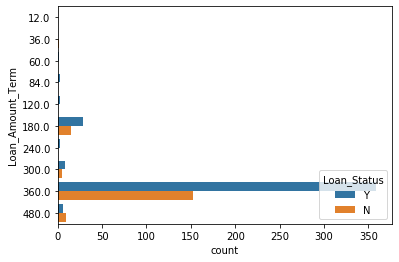

In [27]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status', data=df_train)

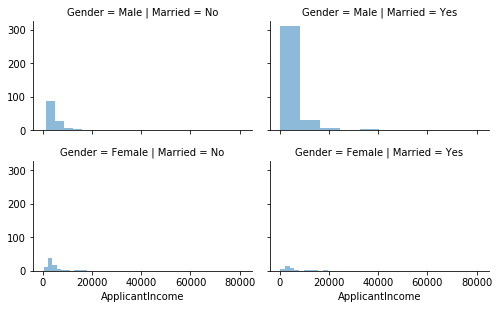

In [34]:
grid = sns.FacetGrid(df_train,row='Gender',col='Married',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)

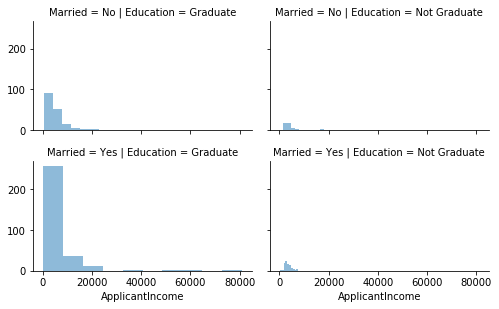

In [35]:
grid = sns.FacetGrid(df_train,row='Married',col='Education',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)

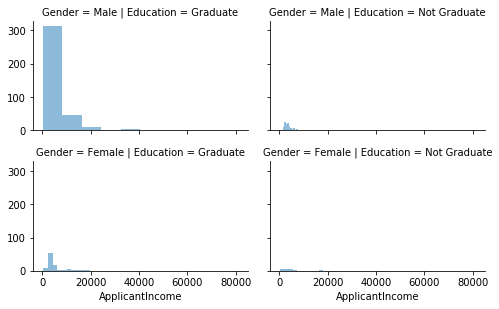

In [36]:
grid = sns.FacetGrid(df_train,row='Gender',col='Education',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)

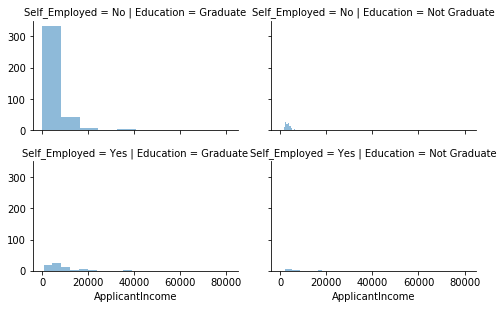

In [37]:
grid = sns.FacetGrid(df_train,row='Self_Employed',col='Education',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)

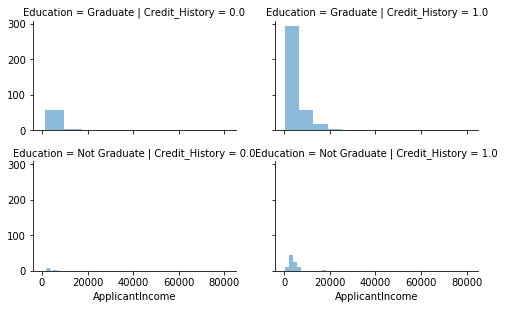

In [38]:
grid = sns.FacetGrid(df_train,row='Education',col='Credit_History',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)

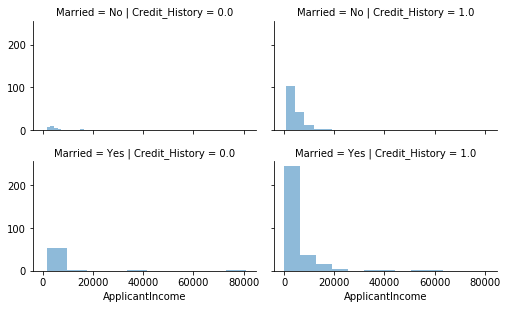

In [41]:
grid = sns.FacetGrid(df_train,row='Married',col='Credit_History',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid.add_legend()

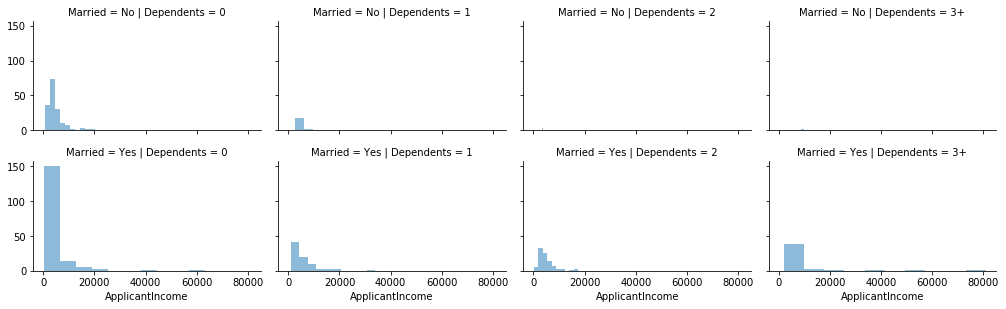

In [47]:
grid = sns.FacetGrid(df_train,row='Married',col='Dependents',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)


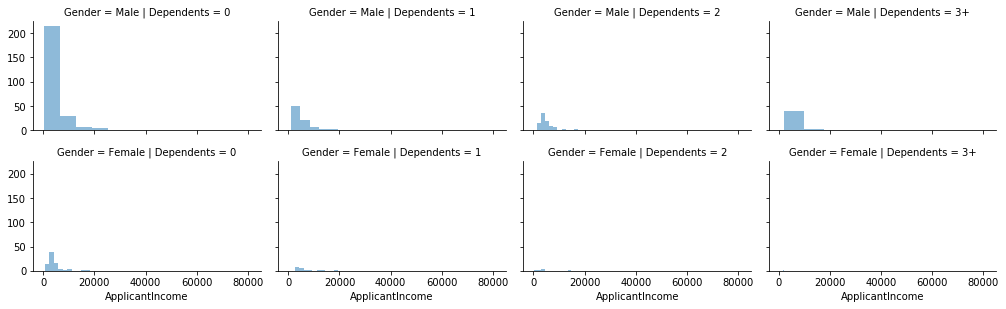

In [48]:
grid = sns.FacetGrid(df_train,row='Gender',col='Dependents',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)


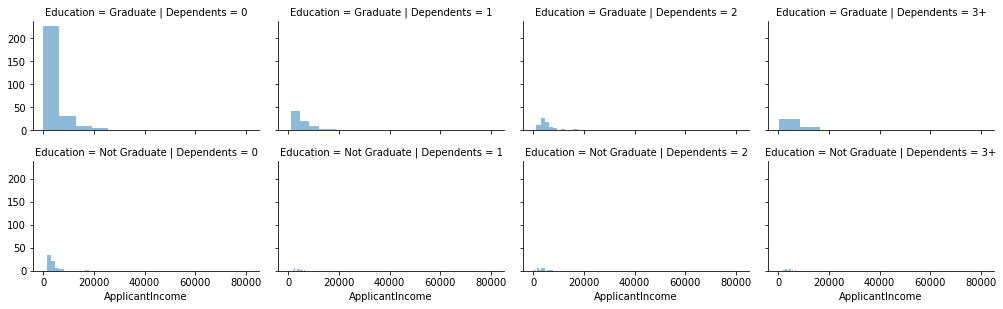

In [49]:
grid = sns.FacetGrid(df_train,row='Education',col='Dependents',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)


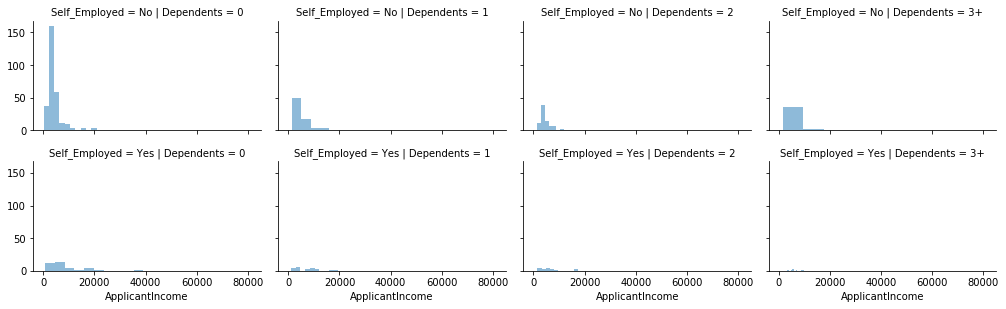

In [50]:
grid = sns.FacetGrid(df_train,row='Self_Employed',col='Dependents',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)


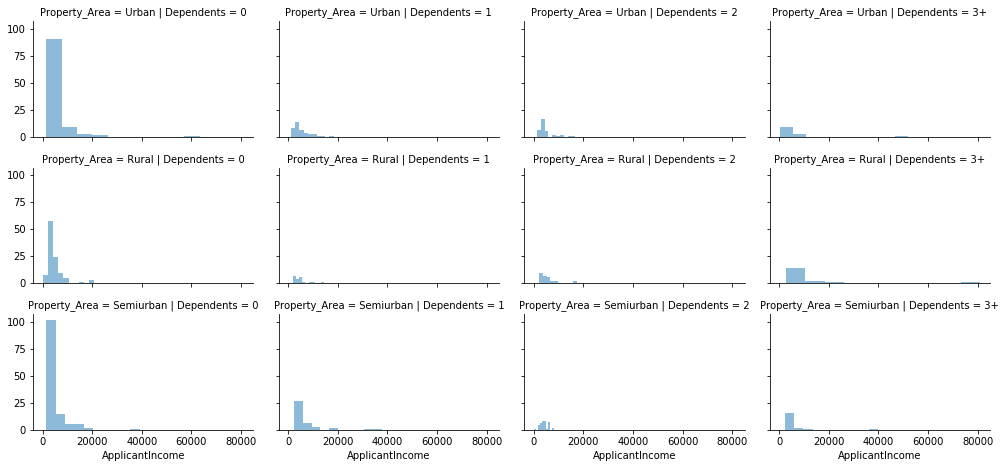

In [52]:
grid = sns.FacetGrid(df_train,row='Property_Area',col='Dependents',size=2.2,aspect=1.6)
grid.map (plt.hist,'ApplicantIncome',alpha=.5,bins=10)


In [55]:
code_numeric = {'Male':1,'Female':2,'Yes':1 , 'No':2, 'Graduate':1, 'Not Graduate':2, 'Urban':3, 'Semiurban':2,'Rural':1,'Y':1,'N':0,'3+':3}

In [57]:
df_train=df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [59]:
df_test=df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [66]:
df_train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null float64
Married              614 non-null float64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(7), int64(4), object(1)
memory usage: 57.7+ KB


In [70]:
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)

In [71]:
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)

In [72]:
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null float64
Married              614 non-null float64
Education            614 non-null int64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(7), int64(5)
memory usage: 57.7 KB


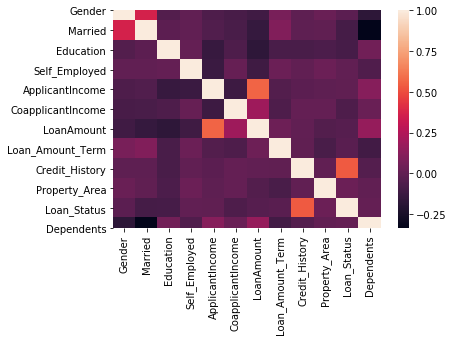

In [74]:
sns.heatmap(df_train.corr())

In [75]:
y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [78]:
model = LogisticRegression ()

In [83]:
model.fit(X_train , y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:

ypred = model.predict(X_test)
print (ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [90]:
evaluation = f1_score(y_test,ypred)
print("Accuracy is :",evaluation)

Accuracy is : 0.8979591836734695
